**Stroke Data Analysis**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

We are taking dataset from kaggle with nearly 5100 rows and 12 dimensions. The dataset is about stroke information whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases and smoking status. Each row of data contains the relevent information about the patient.

What is the reason of stroke?

What kind of people are more prone to stroke?

What is the possibility of having stroke again?

What is the Probability of getting strokes to heart patients?

Probability of stroke to people who are smoking?

What is the role of hypertension in stroke?


 


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as ply

import datetime
import matplotlib
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

**Sample Data**

In [ ]:
data = pd.DataFrame(pd.read_csv("/content/healthcare-dataset-stroke-data.csv"))
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


# New Section

**Data Summary**

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


**Attributes**

**Column Descriptions**

id: unique identifier

gender: "Male", "Female" or "Other"

age: age of the patient

hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

ever_married: "No" or "Yes"

work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

Residence_type: "Rural" or "Urban"

avg_glucose_level: average glucose level in blood

bmi: body mass index

smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

stroke: 1 if the patient had a stroke or 0 if not 

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

**Categorical Features**

gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status, stroke

**Continuous Features**

age, avg_glucose_level, bmi

In [ ]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Missing values

In [ ]:
print("checking and filling the missing values with arithmatic mean imputation\n")
for i in data.columns:
    temp=data[i].isna().sum()
    if(temp>0):
        print(i,":",temp)
        #arithmatic mean imputation
        data[i] = data[i].fillna(np.round(data[i].mean(), 2))
print("\nFINAL CHECK\n")
for i in data.columns:
    print(i,":",data[i].isna().sum())

checking and filling the missing values with arithmatic mean imputation

bmi : 201

FINAL CHECK

id : 0
gender : 0
age : 0
hypertension : 0
heart_disease : 0
ever_married : 0
work_type : 0
Residence_type : 0
avg_glucose_level : 0
bmi : 0
smoking_status : 0
stroke : 0


**Initial Data Exploration**

1.   Gender wise stroke analysis

4.7 % of Females had stroke out of total females in the dataset.

5.1 % of Males had stroke out of total males in the dataset.

In [ ]:
colors=['pink','lightblue']

In [ ]:
data_crosstab = pd.crosstab(data['gender'],
                            data['stroke'], 
                               margins = False)
print(data_crosstab)

stroke     0    1
gender           
Female  2853  141
Male    2007  108


In [ ]:
data_crosstab = pd.crosstab(data['smoking_status'],
                            data['stroke'], 
                               margins = False)
print(data_crosstab)

stroke              0   1
smoking_status           
Unknown          1497  47
formerly smoked   814  70
never smoked     1802  90
smokes            747  42




   
2.   Residence type wise stroke analysis

4.53 % of rural residents had a stroke.

5.2 % of urban residents had a stoke.



In [ ]:
data_crosstab = pd.crosstab(data['Residence_type'],
                            data['stroke'], 
                               margins = False)
print(data_crosstab)

stroke             0    1
Residence_type           
Rural           2399  114
Urban           2461  135


2.11 % of unmarried females had a stroke.

5.99 % of married females had a stroke.

1.04 % of unmarried males had a stroke.

4.87 % of married males had a stroke.

In [ ]:
pd.crosstab([data['gender'],data['ever_married']],[data['stroke']],margins=True)

stroke                  0    1   All
gender ever_married                 
Female No             972   21   993
       Yes           1881  120  2001
Male   No             755    8   763
       Yes           1252  100  1352
All                  4860  249  5109



3.  Stroke analysis with resect to Heart disease & Hypertension.
    

3.38 % of the people who don't have either heart disease or hypertension had a stroke.

12.21 % of the people who don't have heart disease but have hypertension had a stroke.

20.31 % of the people who have both heart disease & hypertension had a stroke.

16.03 % of the people who had heart disease but don't have hypertension had a stroke.





In [ ]:
data_crosstab = pd.crosstab([data['heart_disease'],
                            data['hypertension']],data['stroke'], 
                               margins = False)
print(data_crosstab)

stroke                         0    1
heart_disease hypertension           
0             0             4250  149
              1              381   53
1             0              178   34
              1               51   13


4. Gender wise analysis of stroke with respect to


Females 

3.41 % of the females who don't have either heart disease or hypertension had a stroke.

12.95 % of the females who don't have heart disease but have hypertension had a stroke.

24.13 % of the females who have both heart disease & hypertension had a stroke.

14.28 % of the females who had heart disease but don't have hypertension had a stroke.

Males 

3.34 % of the males who don't have either heart disease or hypertension had a stroke.

11.22 % of the males who don't have heart disease but have hypertension had a stroke.

17.14 % of the males who have both heart disease & hypertension had a stroke.

17.18 % of the males who had heart disease but don't have hypertension had a stroke.



In [ ]:
data_crosstab = pd.crosstab([data['heart_disease'],
                            data['hypertension']],[data['stroke'],data['gender']], 
                               margins = False)
print(data_crosstab)

stroke                          0            1     
gender                     Female  Male Female Male
heart_disease hypertension                         
0             0              2544  1706     90   59
              1               215   166     32   21
1             0                72   106     12   22
              1                22    29      7    6


5. **Work type wise analysis of stroke with respect to bmi and age**

[BMI is a common tool that measures a person’s weight in relation to their height. A BMI calculation provides a single number, which falls into the following categoriesTrusted Source:

A BMI of less than 18.5 means a person is underweight.

A BMI of between 18.5 and 24.9 is ideal.

A BMI of between 25 and 29.9 is overweight.

A BMI over 30 indicates obesity.]

Probability of having stroke

4.87 % of the people had stroke.

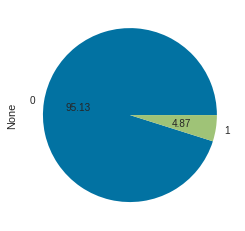

In [ ]:
data.groupby('stroke').size().plot(kind='pie', autopct='%.2f')

Gender wise analysis

5.1 % of Males had stroke out of total males in the dataset.

4.7 % of Females had stroke out of total females in the dataset.

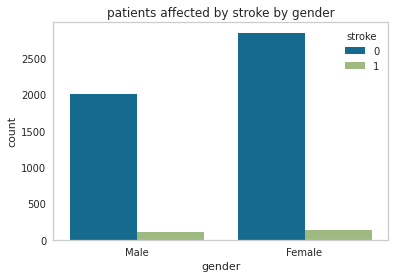

In [ ]:
sns.countplot(x=data['gender'],hue=data['stroke'])
sns.set_style("darkgrid")
plt.title("patients affected by stroke by gender")
plt.grid(False)
plt.show()

2994 people in our dataset are females.

2115 people in our dataset are males.

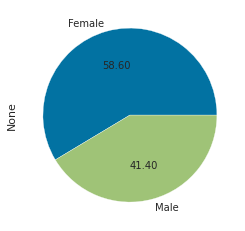

In [ ]:
data.groupby('gender').size().plot(kind='pie', autopct='%.2f')

Residence type wise analysis

2513 people are from rural area in our dataset.

2596 people are from urban area in our dataset.

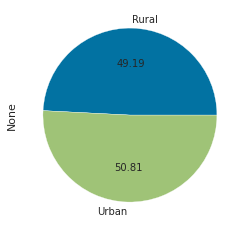

In [ ]:
data.groupby('Residence_type').size().plot(kind='pie', autopct='%.2f')

Work type wise analysis

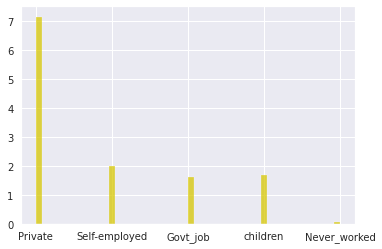

In [ ]:
plt.hist(data['work_type'],50, density=1, facecolor='y', alpha=0.75)
plt.show()

From the below, we can interpret that stroke is more prone at the age greater than 40.

In [ ]:
ply.bar(data_frame=data,x=data.age,y=data.stroke)

From the below graph we can infer that peak of stroke is around the age 60 to 80.

Text(0.5, 0, 'Age')

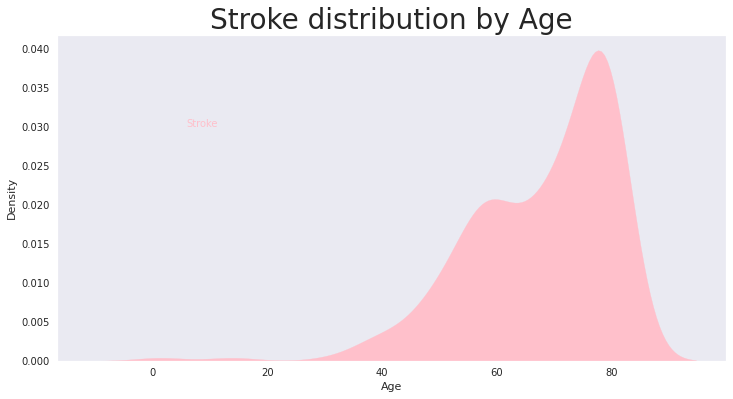

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plt.title('Stroke distribution by Age', size=28)
ax.grid(False)
ax.can_pan()
ax.can_zoom()
ax.axes.get_yaxis().set_visible(True)
ax.text(6, 0.03, 'Stroke', {'color': colors[0]}, alpha=1)

sns.kdeplot(data=data[data.stroke == 1],
            x='age', shade=True, ax=ax, color=colors[0], alpha=1)

plt.xlabel('Age')

We can take the following inferences from the below graph:

People working in private sectors have higher chances of getting stroke.
People having BMI of the range 25-35 have higher chances of getting a stroke.
People having age from 50-80 have higher chances of getting stroke.

People of age 60-80, working in private sector & having a BMI range of 25-30 have the highest chances of getting a stroke.

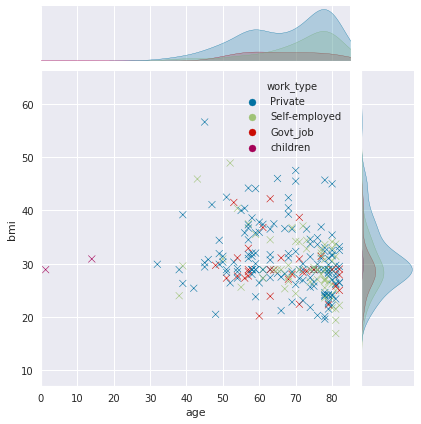

In [ ]:
age=data.age.where(data['stroke']==1)
bmi=data.bmi.where(data['stroke']==1)
x=sns.jointplot(x= age,y=bmi,dropna=True,xlim=(0,85),hue=data.work_type,marker='x')

People who are married have chances to get a stroke in the age range of 30 to 80.

People who are not married have chances to get a stroke in the age range of 40 to 80.

We can infer that, marriage influence the chancesof getting stroke. 

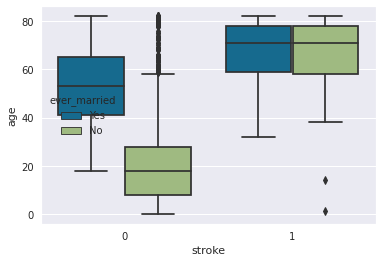

In [ ]:
sns.boxplot(x='stroke',y='age',hue='ever_married',data=data)

We can infer from below chart that chances of getting stroke is maximum in the age range of 50 to 80.

In [ ]:
rang=range(0,101,10)
x1=age.groupby(pd.cut(data.age,rang)).count()
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),columns=['a', 'b', 'c'])
print(df2)
ply.bar(x=range(0,100,10),y=x1,pattern_shape_sequence="."'''xlabel="age intervals0",ylabel='count',''',title='No of stroke patients on age intervals',
        labels=('age','count'))

   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9


We can infer from the below graph that the peak age of getting stroke is 70.

In [ ]:
ply.line(data_frame=data, x= range(0,100,10),y=x1,  )

In [ ]:
ply.scatter_3d(data_frame=data, x='avg_glucose_level',y='bmi',z='heart_disease',size='stroke')

In [ ]:
ply.density_heatmap(data_frame=data, x='avg_glucose_level',y='bmi',z='stroke')

CLUSTERING using KMEANS

In [ ]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.60,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.89,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.50,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.40,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.00,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,0,80.0,1,0,1,2,1,83.75,28.89,2,0
5105,44873,0,81.0,0,0,1,3,1,125.20,40.00,2,0
5106,19723,0,35.0,0,0,1,3,0,82.99,30.60,2,0
5107,37544,1,51.0,0,0,1,2,0,166.29,25.60,1,0


In [ ]:
data.info()
data['avg_glucose_level']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int64  
 6   work_type          5109 non-null   int64  
 7   Residence_type     5109 non-null   int64  
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   int64  
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.1 KB


0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5104     83.75
5105    125.20
5106     82.99
5107    166.29
5108     85.28
Name: avg_glucose_level, Length: 5109, dtype: float64

In [ ]:
ds = data.copy()
ds = ds.drop('id', axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
scaled_ds

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.189791,1.051242,-0.328637,4.184599,0.723678,-0.153852,0.983884,2.706450,1.001057,-0.351819,4.417926
1,-0.840484,0.785889,-0.328637,-0.238972,0.723678,0.763335,-1.016380,2.121652,-0.000569,0.581434,4.417926
2,1.189791,1.626174,-0.328637,4.184599,0.723678,-0.153852,-1.016380,-0.004867,0.468415,0.581434,4.417926
3,-0.840484,0.255182,-0.328637,-0.238972,0.723678,-0.153852,0.983884,1.437473,0.715249,1.514687,4.417926
4,-0.840484,1.581949,3.042866,-0.238972,0.723678,0.763335,-1.016380,1.501297,-0.635842,0.581434,4.417926
...,...,...,...,...,...,...,...,...,...,...,...
5104,-0.840484,1.626174,3.042866,-0.238972,0.723678,-0.153852,0.983884,-0.494481,-0.000569,0.581434,-0.226351
5105,-0.840484,1.670400,-0.328637,-0.238972,0.723678,0.763335,0.983884,0.420922,1.442760,0.581434,-0.226351
5106,-0.840484,-0.363976,-0.328637,-0.238972,0.723678,0.763335,-1.016380,-0.511266,0.221581,0.581434,-0.226351
5107,1.189791,0.343633,-0.328637,-0.238972,0.723678,-0.153852,-1.016380,1.328375,-0.427982,-0.351819,-0.226351


In [ ]:
pca = PCA(n_components=4)
pca.fit(scaled_ds)
PCA_ds=pd.DataFrame(pca.transform(scaled_ds), columns=(['c1','c2','c3','c4']))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
c1,5109.0,-2.800331e-16,1.634401,-3.713900,-1.000504,0.285119,1.097440,4.700439
c2,5109.0,-3.286556e-16,1.151910,-2.576308,-0.824840,-0.209088,0.630917,5.758365
c3,5109.0,-3.211802e-17,1.004214,-2.616999,-0.938726,-0.245594,0.890849,2.634946
c4,5109.0,-4.287473e-17,0.989426,-2.370311,-0.786514,0.085354,0.750521,3.628338


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning:

invalid value encountered in sqrt



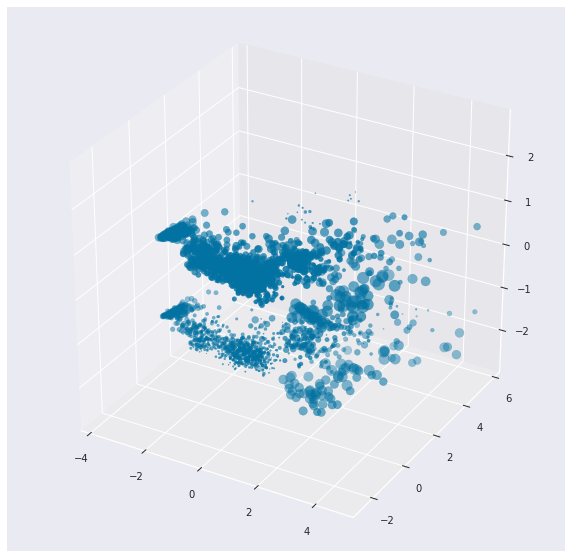

In [ ]:
x=PCA_ds['c1']
y=PCA_ds['c2']
z=PCA_ds['c3']
p=PCA_ds['c4']

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ax=ax.scatter(x,y,z,s=p*40, marker='o')
plt.show()

#ply.scatter_3d(data_frame=PCA_ds, x='c1',y='c2',z='c3',size=[])

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

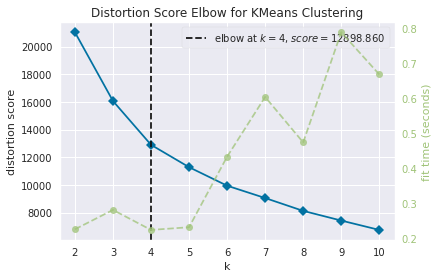

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

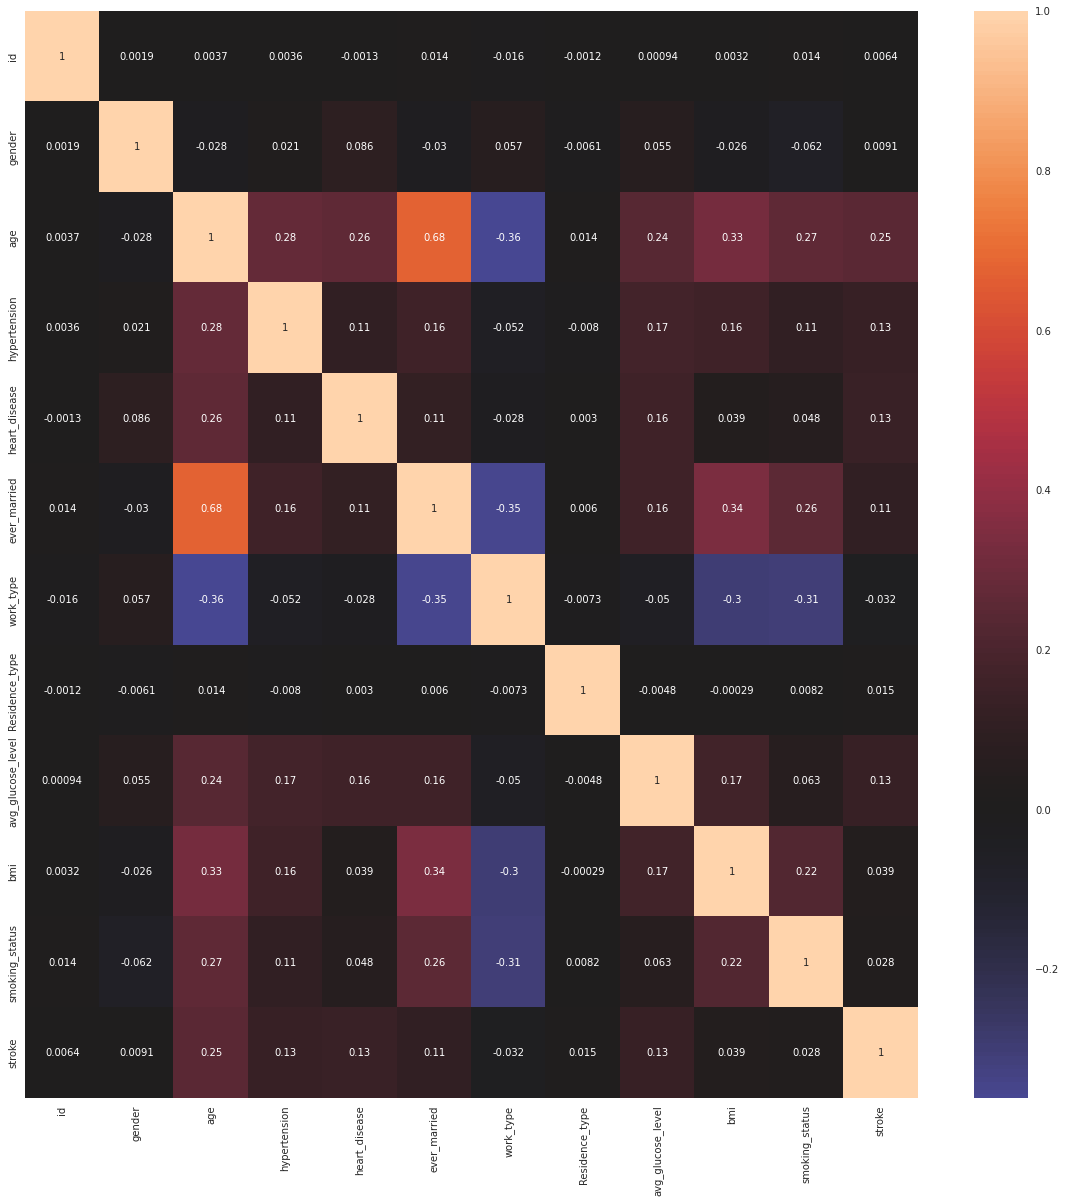

In [ ]:
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

In [ ]:
AC = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning:

invalid value encountered in sqrt



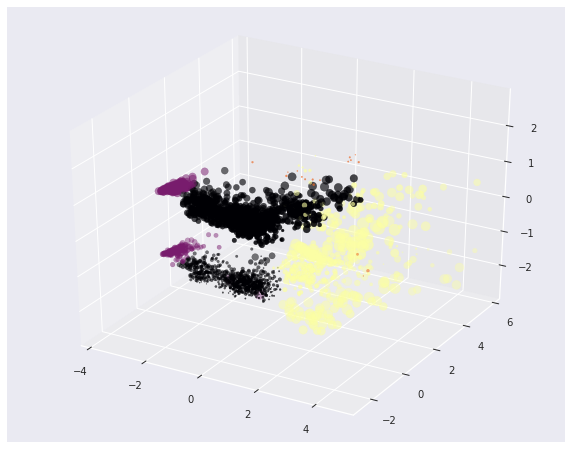

In [ ]:
from matplotlib import cm
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=p*40, c=PCA_ds["Clusters"], marker='o',cmap=cm.inferno)
plt.show()

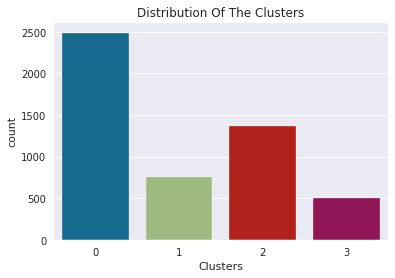

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"])
sns.color_palette("tab10")
pl.set_title("Distribution Of The Clusters")
plt.show()

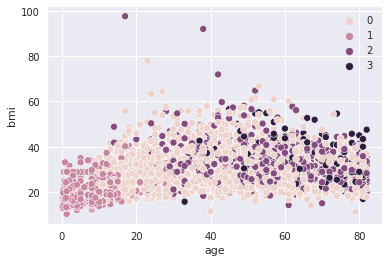

In [ ]:
pl = sns.scatterplot(data = data,x=data["age"], y=data["bmi"],hue=data["Clusters"])
sns.color_palette("tab10")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

89.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

86.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

64.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



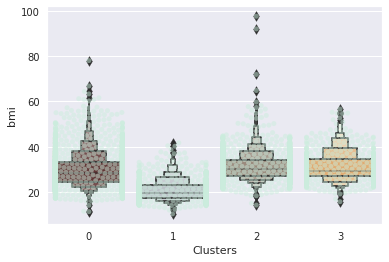

In [ ]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["bmi"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["bmi"], palette=pal)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<Figure size 432x288 with 0 Axes>

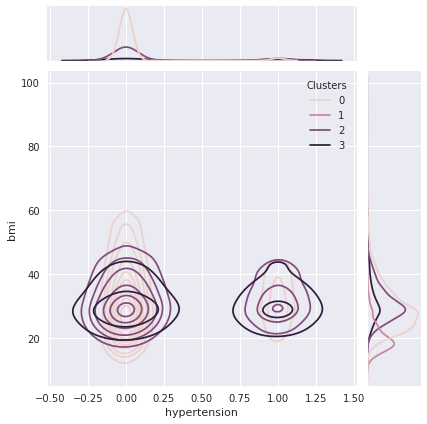

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<Figure size 432x288 with 0 Axes>

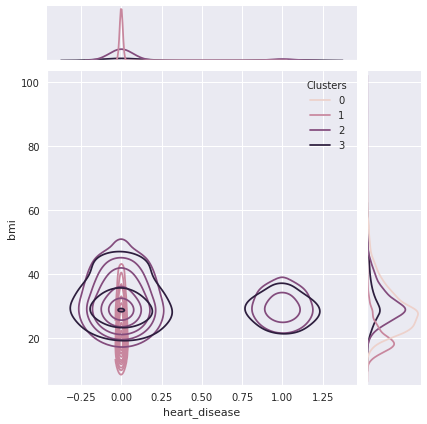

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<Figure size 432x288 with 0 Axes>

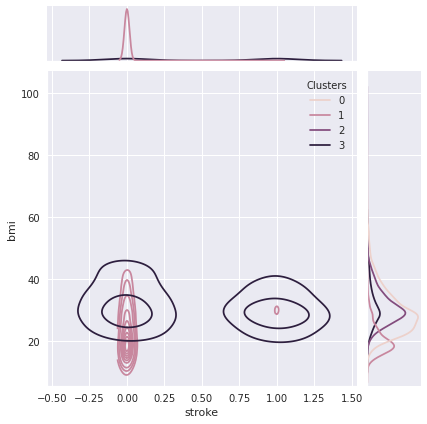

<Figure size 432x288 with 0 Axes>

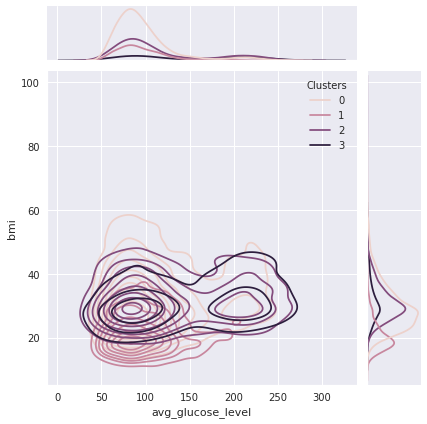

<Figure size 432x288 with 0 Axes>

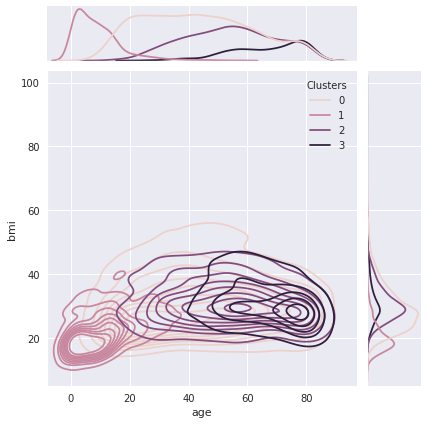

In [ ]:
Personal = [ "hypertension","heart_disease","stroke", "avg_glucose_level","age"]
for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["bmi"], hue =data["Clusters"], kind="kde")
    sns.color_palette("Paired")
    plt.show()

**cluster 0** = consists of people who has no hyper tension and a wide range of bmi and people of a large vareity of age , doesnt contain people who doesnt have heart disease.

**cluster 1** = consists of people with no heart disease and hypertensionage range of 0 to 25 and people who are hypoglycemic


**cluster 2** = consists of people with wide range of bmi and has heart disease age from 40 to 80

**cluster 3** = consists of people from age 60 to 80, has a  iimbalancen the blood glucose level majorly people who had stroke

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning:

invalid value encountered in sqrt



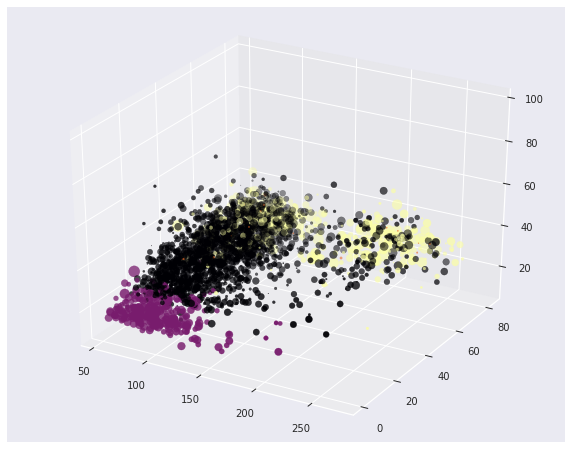

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter( data['avg_glucose_level'],data['age'], data['bmi'], s=p*40, c=PCA_ds["Clusters"], marker='o',cmap=cm.inferno)
plt.show()

*Conclusions*

Males have slight higher chances of getting strokes.

Urban residents have higher chances of getting a stroke.

Single females have more chances of getting stroke in comparison to males.

There is a high chance of getting a stroke if you have both heart disease & hypertension.

There is a 3.38 % probablity of getting a heart stroke even if you don't have` heart disease & hypertension.

People who have heart disease are more prone to have a stroke in comparison to people who have hypertension.


